In [190]:
from IPython.display import display, HTML

# Define HTML and CSS for styled text
html_code = '''
<div style="
    background-color: #333333;
    color: white;
    padding: 15px;
    font-size: 24px;
    text-align: center;
    border-radius: 8px;
    font-weight: bold;
">
    User Behavior Classification and Data Usage Prediction
</div>
'''

# Display the styled HTML
display(HTML(html_code))

## **Data Preprocessing and Exploration**

### - **Import Labraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [3]:
mu = pd.read_csv('user_behavior_dataset.csv')
mu.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


### - **Data Checking**

In [5]:
print(mu.info(),'\n')
print('Shape:', mu.shape,'\n')
print('Total number of Null:','\n', mu.isna().sum(),'\n')
print('Total number of Duplicated:', mu.duplicated().sum(),'\n')
print('Number of Unique','\n', mu.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None 

Shape: (700, 11) 

Total number of Null: 
 User ID                       0
Device Mo

### - **EDA**
#### Descriptive Statistics:

In [7]:
ds = mu.drop(columns=['User ID']).describe().round(2)
ds

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,271.13,5.27,1525.16,50.68,929.74,38.48,2.99
std,177.20,3.07,819.14,26.94,640.45,12.01,1.40
min,30.00,1.00,302.00,10.00,102.00,18.00,1.00
25%,113.25,2.50,722.25,26.00,373.00,28.00,2.00
50%,227.50,4.90,1502.50,49.00,823.50,38.00,3.00
75%,434.25,7.40,2229.50,74.00,1341.00,49.00,4.00
max,598.00,12.00,2993.00,99.00,2497.00,59.00,5.00


#### **Univariate Analysis:**
##### Pie Chart, Histogram, KDE and Box Plot

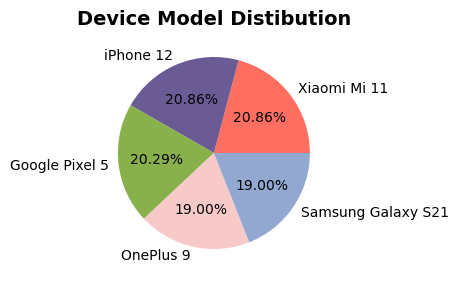

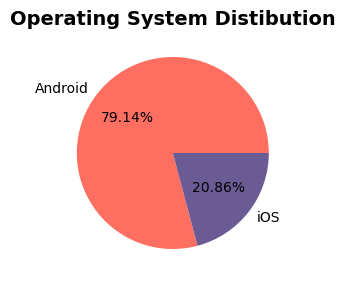

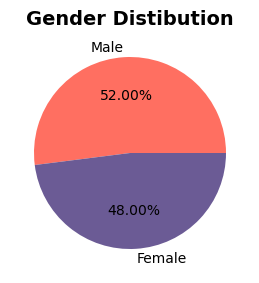

In [9]:
pc = ['Device Model','Operating System','Gender']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

for x in pc:
    plt.figure(figsize=(6,4))
    plt.pie(mu[x].value_counts(), labels=mu[x].value_counts().index, autopct="%.2f%%", colors=colors)
    plt.title(x +' Distibution', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(left=0.3, right=0.7)
    plt.show()
    print('')

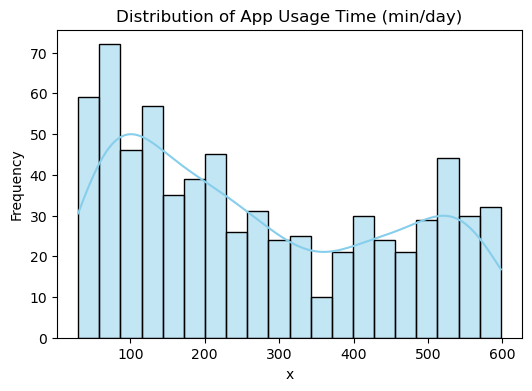

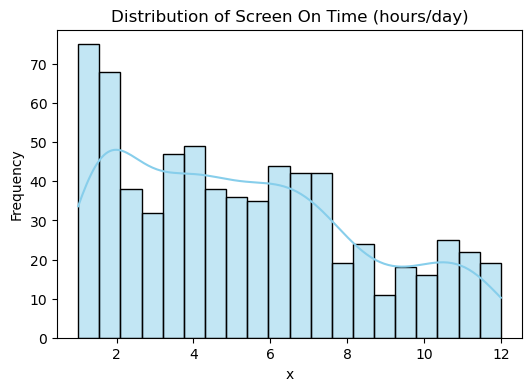

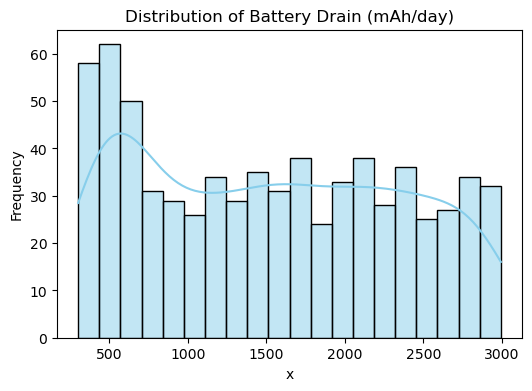

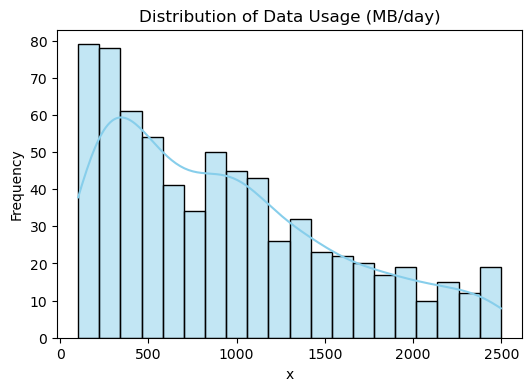

In [11]:
hc = ['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Data Usage (MB/day)']

for x in hc:
    plt.figure(figsize=(6,4))
    sns.histplot(mu[x], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of '+ x)
    plt.xlabel('x')
    plt.ylabel('Frequency')
    plt.show()
    print('')

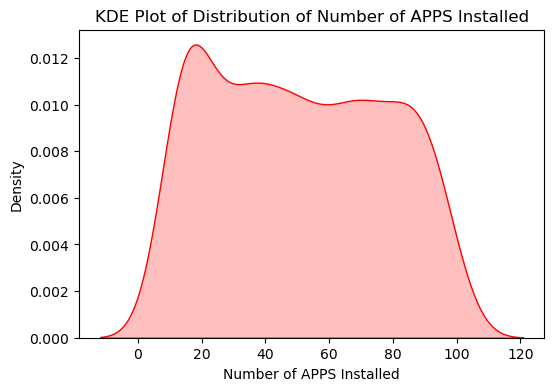

In [13]:
plt.figure(figsize=(6,4))
sns.kdeplot(mu['Number of Apps Installed'], fill=True, color='red')
plt.title('KDE Plot of Distribution of Number of APPS Installed')
plt.xlabel('Number of APPS Installed')
plt.ylabel('Density')
plt.show()

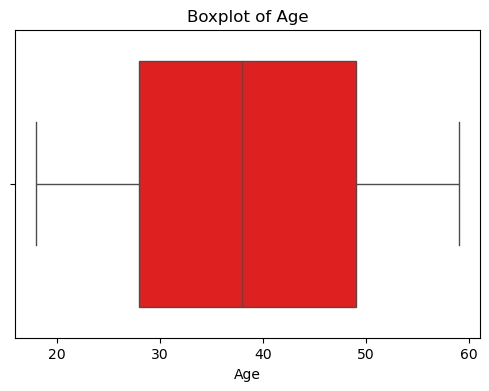

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=mu['Age'], color='red')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#### **Bivariate Analysis**
##### Box Plot, Scatter Plot, Violin Plot, Count Plot, Swarm Plot and Stripp Plot

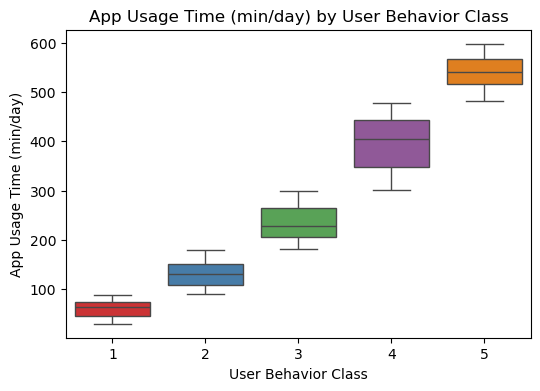

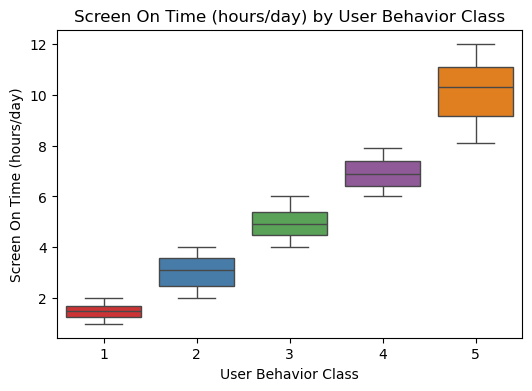

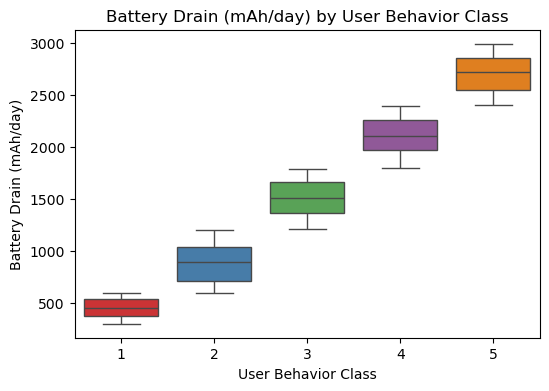

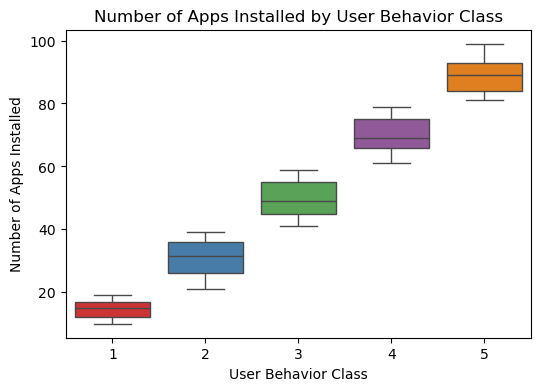

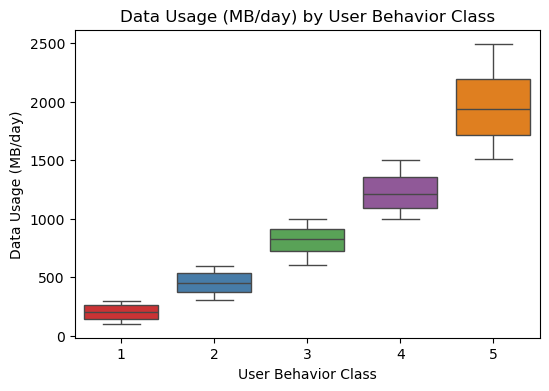

In [17]:
bp = ['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)']

for a in bp:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=mu, x='User Behavior Class', y=a, palette='Set1', hue='User Behavior Class',legend=False)
    plt.title(a+' by User Behavior Class')
    plt.xlabel('User Behavior Class')
    plt.ylabel(a)
    plt.show()
    print('')

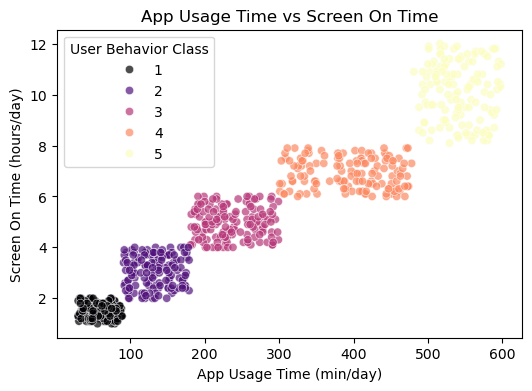

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=mu,x='App Usage Time (min/day)',y='Screen On Time (hours/day)',hue='User Behavior Class',palette='magma',alpha=0.7)
plt.title('App Usage Time vs Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

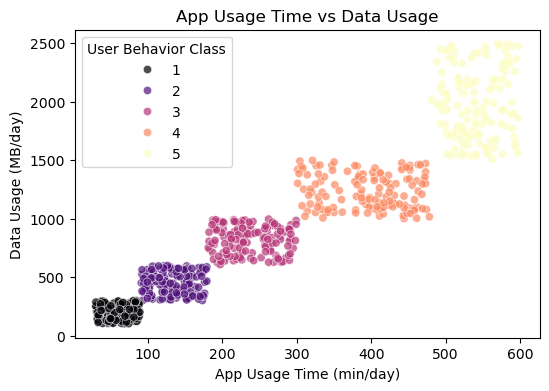

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=mu,x='App Usage Time (min/day)',y='Data Usage (MB/day)',hue='User Behavior Class',palette='magma',alpha=0.7)
plt.title('App Usage Time vs Data Usage')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

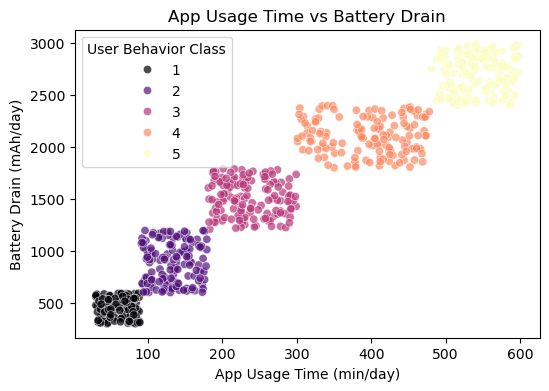

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=mu,x='App Usage Time (min/day)',y='Battery Drain (mAh/day)',hue='User Behavior Class',palette='magma',alpha=0.7)
plt.title('App Usage Time vs Battery Drain')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

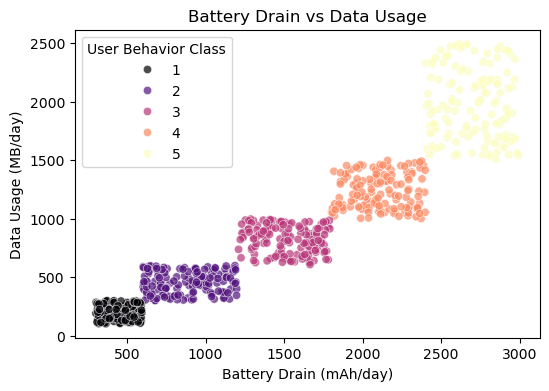

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=mu,x='Battery Drain (mAh/day)',y='Data Usage (MB/day)',hue='User Behavior Class',palette='magma',alpha=0.7)
plt.title('Battery Drain vs Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

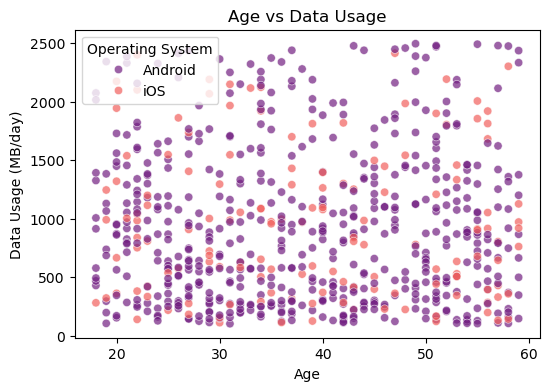

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=mu,x='Age',y='Data Usage (MB/day)',hue='Operating System',palette='magma',alpha=0.7)
plt.title('Age vs Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()

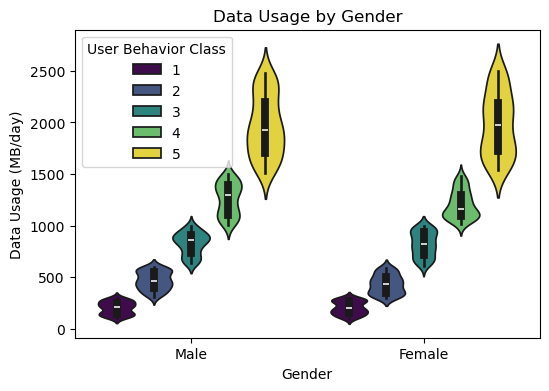

In [29]:
plt.figure(figsize=(6,4))
sns.violinplot(data=mu,x='Gender',y='Data Usage (MB/day)',palette='viridis',hue='User Behavior Class',legend=True)
plt.title('Data Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Data Usage (MB/day)')
plt.show()

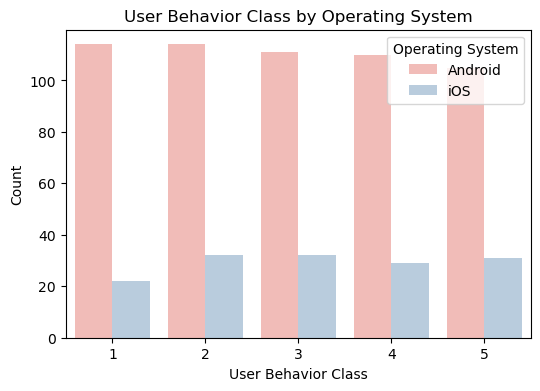

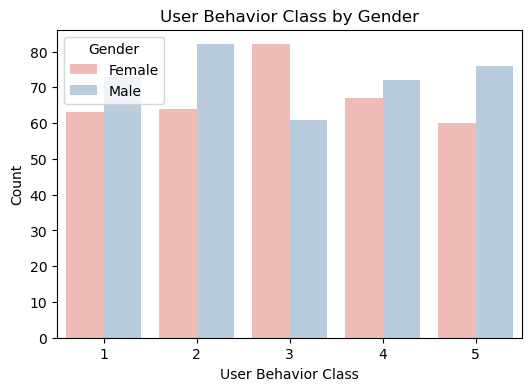

In [31]:
cp = ['Operating System','Gender']
for b in cp:
    plt.figure(figsize=(6,4))
    sns.countplot(data=mu,x='User Behavior Class', hue=b, palette='Pastel1')
    plt.title('User Behavior Class by '+b)
    plt.xlabel('User Behavior Class')
    plt.ylabel('Count')
    plt.show()
    print('')

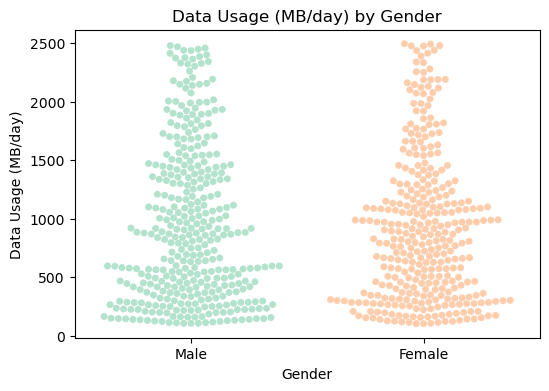

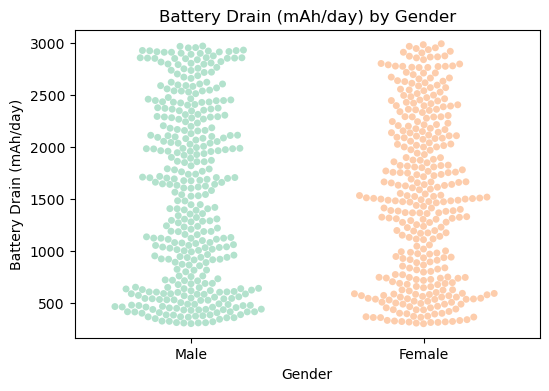

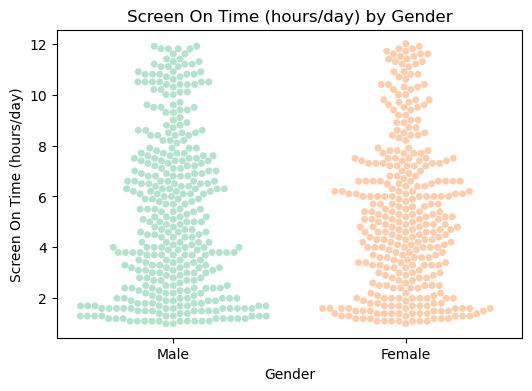

In [33]:
sp = ['Data Usage (MB/day)','Battery Drain (mAh/day)','Screen On Time (hours/day)']
for c in sp:
    plt.figure(figsize=(6,4))
    sns.swarmplot(data=mu,x='Gender',y=c,palette='Pastel2')
    plt.title(c+' by Gender')
    plt.xlabel('Gender')
    plt.ylabel(c)
    plt.show()
    print('')

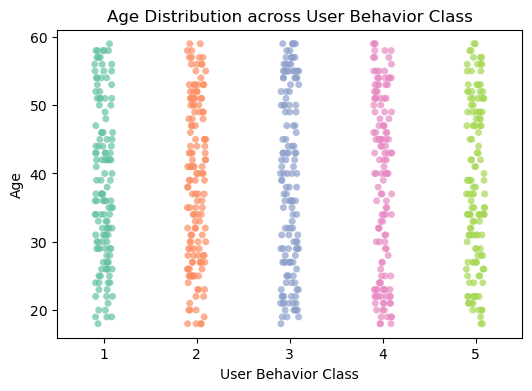

In [35]:
plt.figure(figsize=(6,4))
sns.stripplot(data=mu, x='User Behavior Class',y='Age',jitter=True,alpha=0.7,palette='Set2')
plt.title('Age Distribution across User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Age')
plt.show()

#### **Multivariate Analysis**
##### Pair Plot and Heatmap for Correlation Matrix

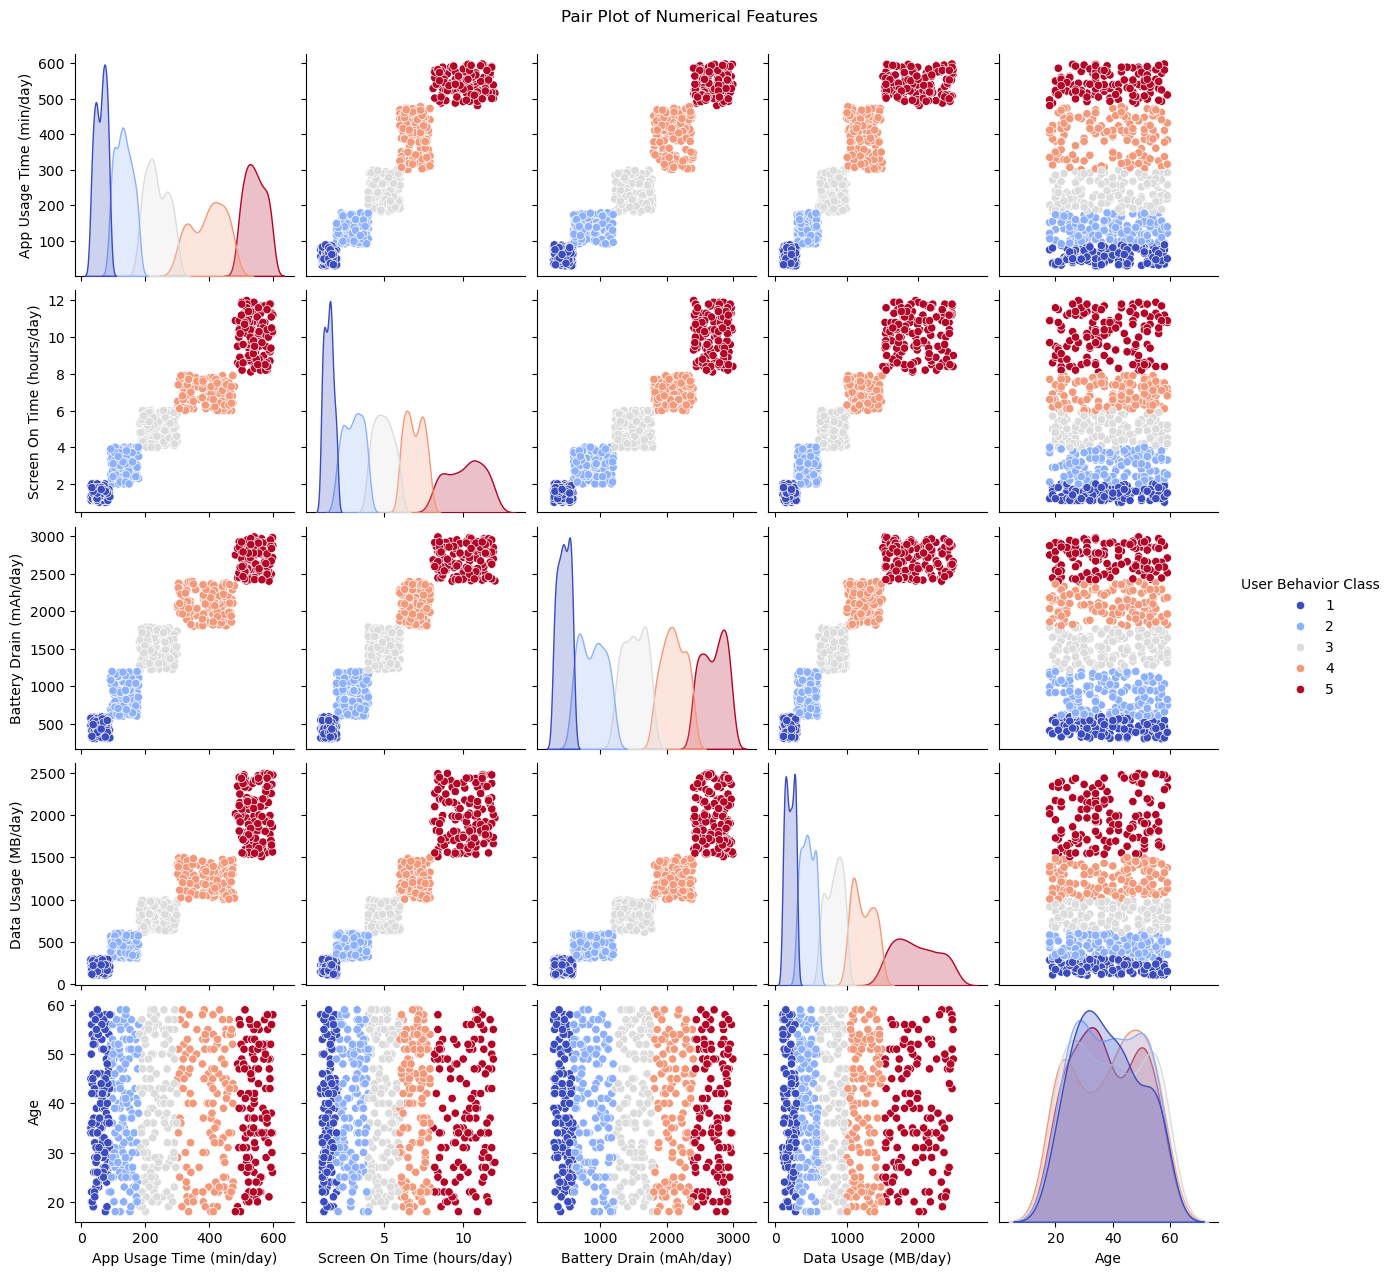

In [38]:
sns.pairplot(data=mu, vars=['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Data Usage (MB/day)','Age'],
             hue='User Behavior Class', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Features',y=1.02)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

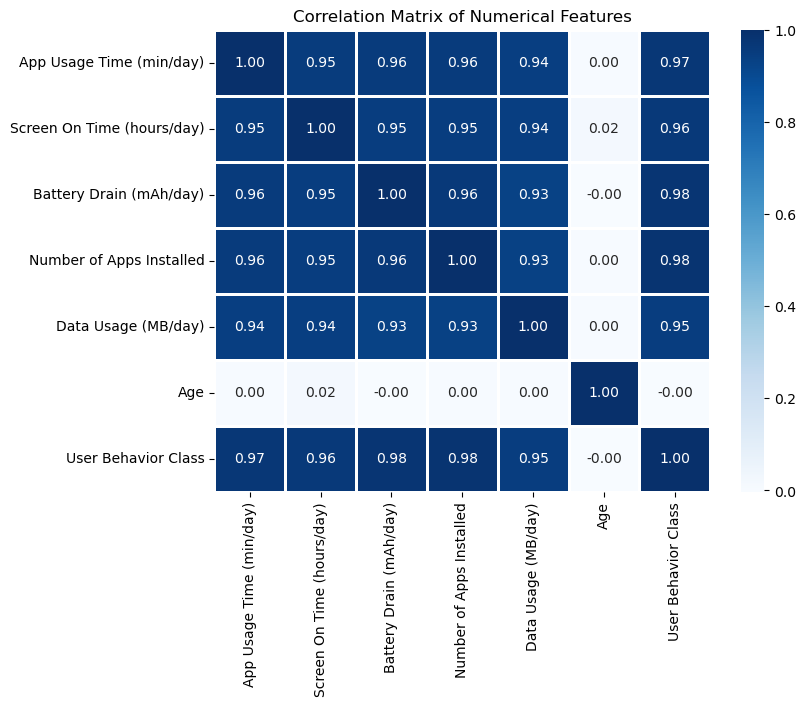

In [40]:
plt.figure(figsize=(8,6))
numeric_only = mu.select_dtypes(include='number').drop(columns='User ID').corr()
sns.heatmap(numeric_only, annot=True, cmap='Blues',fmt='.2f',linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show

## **Feature Engineering for Classification (Random Forest)**
### - Using ColumnTransformer for StandardScaler and OneHotEncoder

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [44]:
x = mu.drop(columns=['User ID','User Behavior Class'])
y = mu['User Behavior Class']

categorical_col = ['Device Model','Operating System','Gender']
numerical_col = ['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)',
                 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('Num', StandardScaler(), numerical_col),
        ('OHE', OneHotEncoder(drop='first'), categorical_col)])
preprocessor

ColumnTransformer(transformers=[('Num', StandardScaler(),
                                 ['App Usage Time (min/day)',
                                  'Screen On Time (hours/day)',
                                  'Battery Drain (mAh/day)',
                                  'Number of Apps Installed',
                                  'Data Usage (MB/day)', 'Age']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['Device Model', 'Operating System',
                                  'Gender'])])

### Using pipeline to combie transformer and classifier

In [46]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## **Create Training and Testing Dataset and Do Classification Prediction**
### - Evaluation Metrics and Feature Important Analysis

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



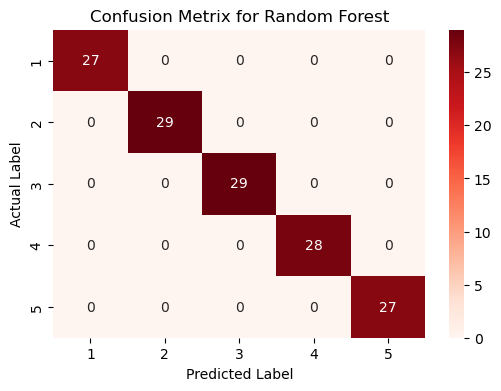

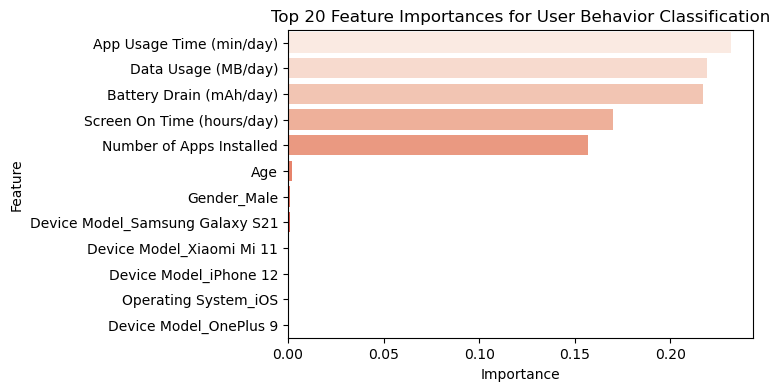

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
print('Classification Report:\n', classification_report(y_test, predicted_y))

cm = confusion_matrix(y_test, predicted_y)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Metrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


if hasattr(model.named_steps['classifier'], 'feature_importances_'):
    
    ohe = model.named_steps['preprocessor'].named_transformers_['OHE']
    feature_names = numerical_col + list(ohe.get_feature_names_out(categorical_col))
    
    importances = model.named_steps['classifier'].feature_importances_
    feature_importance_mu = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_mu = feature_importance_mu.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_mu.head(20), palette='Reds')
    plt.title('Top 20 Feature Importances for User Behavior Classification')
    plt.show()

## **Feature Engineering for Regression (Random Forest)**
### - Using ColumnTransformer for StandardScaler and OneHotEncoder

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
X = mu.drop(columns=['User ID','Data Usage (MB/day)'])
Y = mu['Data Usage (MB/day)']

cat_col = ['Device Model','Operating System','Gender']
num_col = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Age',
           'User Behavior Class']

preprocessor2 = ColumnTransformer(
    [('Num', StandardScaler(), num_col),
     ('OHE', OneHotEncoder(drop='first'), cat_col)])
preprocessor2

ColumnTransformer(transformers=[('Num', StandardScaler(),
                                 ['App Usage Time (min/day)',
                                  'Screen On Time (hours/day)',
                                  'Battery Drain (mAh/day)',
                                  'Number of Apps Installed', 'Age',
                                  'User Behavior Class']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['Device Model', 'Operating System',
                                  'Gender'])])

In [58]:
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('regressor', RandomForestRegressor(random_state=42))])
model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Age',
                                                   'User Behavior Class']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## **Create Training and Testing Dataset and do Regression Prediction**
### - Evaluation Metrics and Feature Important Analysis

Mean Absolute Error: 115.64057142857143
Mean Squared Error: 23170.915347142858
R-squared (R²): 0.9341031798194561


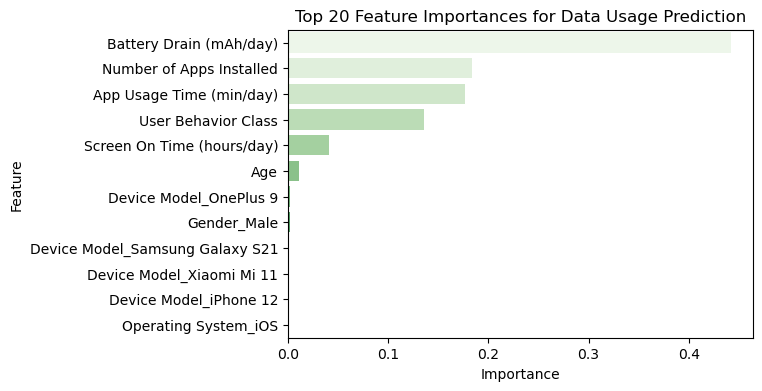

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model2.fit(X_train, Y_train)
Predicted_Y = model2.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Predicted_Y))
print('Mean Squared Error:', mean_squared_error(Y_test, Predicted_Y))
print('R-squared (R²):', r2_score(Y_test, Predicted_Y))

if hasattr(model2.named_steps['regressor'], 'feature_importances_'):
    
    ohe = model2.named_steps['preprocessor'].named_transformers_['OHE']
    feature_names = num_col + list(ohe.get_feature_names_out(cat_col))
    
    importances = model2.named_steps['regressor'].feature_importances_
    feature_importance_mu = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_mu = feature_importance_mu.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_mu.head(20), palette='Greens')
    plt.title('Top 20 Feature Importances for Data Usage Prediction')
    plt.show()

## **Refining Feature Engineering for Regression (Random Forest)**
### - Adding the New Features and Using OneHotEncoder
- Many machine learning algorithms (like linear regression, k-nearest neighbors, and support vector machines) are sensitive to the scale of the data. However, tree-based models like Random Forests are generally not affected by the scale of numerical features. Thus, skipping standardization may not significantly impact the performance Random Forest model.
- Adding new features without scaling might introduce complexities that the model has to learn from the data. If the new features capture important relationships, they might help improve the model's performance even without scaling.

In [62]:
# Convert column App Usage Time from min/day to hours/day
mu['App Usage Time (min/day)'] = mu['App Usage Time (min/day)'] / 60
mu = mu.rename(columns={'App Usage Time (min/day)':'App Usage Time (hours/day)'})
mu['App Usage Time (hours/day)'] = mu['App Usage Time (hours/day)'].round(2)

In [64]:
# Add feature: App Usage over Screen
mu['App Usage over Screen'] = mu['App Usage Time (hours/day)'] / mu['Screen On Time (hours/day)']

# Add feature: Data Usage per App hour
mu['Data Usage per App hour'] = mu['Data Usage (MB/day)'] / mu['App Usage Time (hours/day)']

# Add feature: Data Usage per App
mu['Data Usage per App'] = mu['Data Usage (MB/day)'] / mu['Number of Apps Installed']

# Add feature: Battery Drain per Age
mu['Battery Drain per Age'] = mu['Battery Drain (mAh/day)'] / mu['Age']

# Add feature: Heavy App User
app_usage = 270/60  # 4.5hours
mu['Heavy App User'] = mu['App Usage Time (hours/day)'] > app_usage

# Add feature: Screen Time per App
mu['Screen On Time per App'] = mu['Screen On Time (hours/day)'] / mu['Number of Apps Installed']

# Add feature: Age Group
def age_group(Age):
    if Age < 20:
        return 1
    elif 20 <= Age < 30:
        return 2
    elif 30 <= Age < 50:
        return 3
    else:
        return 4

mu['Age Group'] = mu['Age'].apply(age_group)

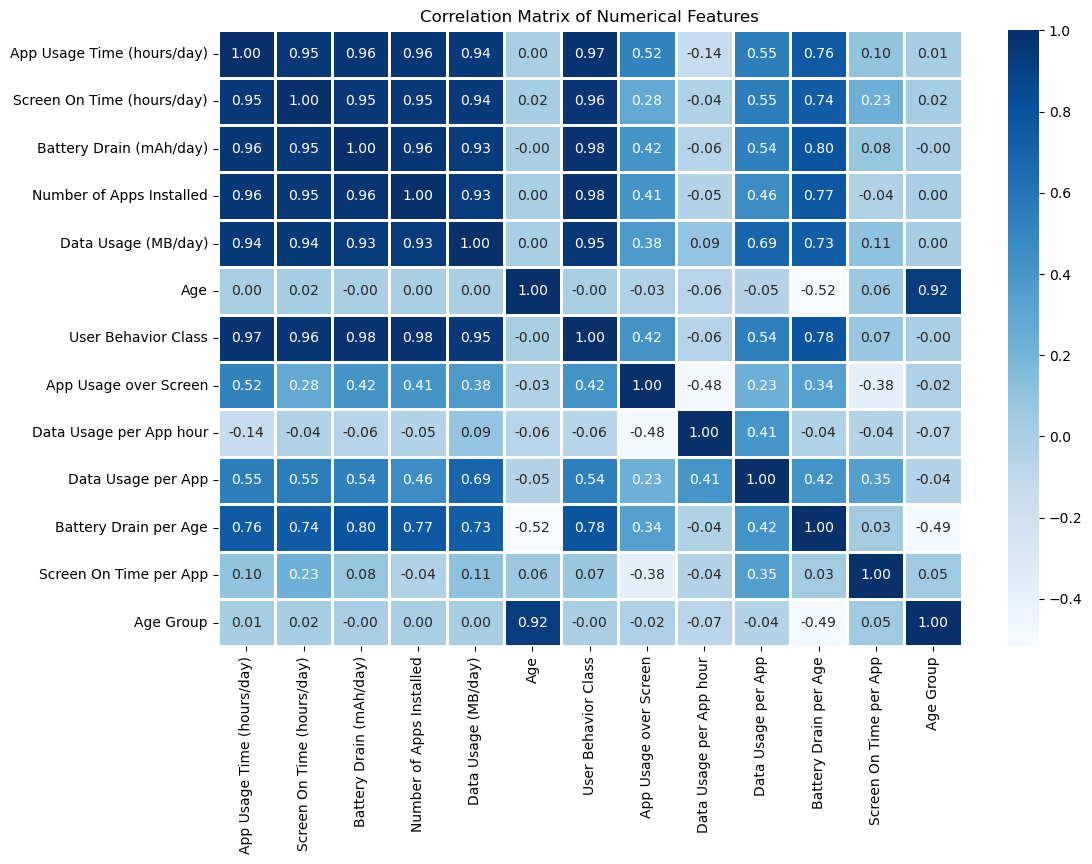

In [66]:
plt.figure(figsize=(12,8))
numeric_only = mu.select_dtypes(include='number').drop(columns='User ID').corr()
sns.heatmap(numeric_only, annot=True, cmap='Blues',fmt='.2f',linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

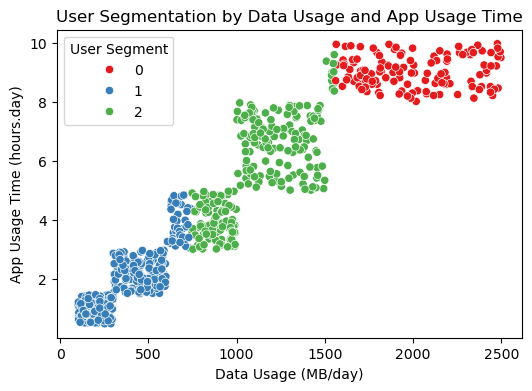

In [68]:
# Add feature: User Segment by K-Means Clustering
from sklearn.cluster import KMeans

clustering_features = mu[['App Usage Time (hours/day)','Screen On Time (hours/day)','Data Usage (MB/day)']]
mu['User Segment'] = KMeans(n_clusters=3, n_init='auto', random_state=42).fit_predict(clustering_features)

plt.figure(figsize=(6,4))
sns.scatterplot(data=mu, x='Data Usage (MB/day)', y='App Usage Time (hours/day)', hue='User Segment', palette='Set1', legend=True)
plt.title('User Segmentation by Data Usage and App Usage Time')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('App Usage Time (hours.day)')
plt.show()

In [70]:
mu.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (hours/day)    0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
App Usage over Screen         0
Data Usage per App hour       0
Data Usage per App            0
Battery Drain per Age         0
Heavy App User                0
Screen On Time per App        0
Age Group                     0
User Segment                  0
dtype: int64

## **K-Fold Cross-Validation and Final Prediction**

In [72]:
from sklearn.model_selection import KFold

# Split the data into train and test sets
X = mu.drop(columns=['User ID', 'Data Usage (MB/day)'])
Y = mu['Data Usage (MB/day)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_columns = ['Device Model', 'Operating System', 'Gender']
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Set up the OneHotEncoder within a ColumnTransformer
preprocessor3 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # Leave numerical columns unchanged
)

# Initialize the RandomForestRegressor model
model3 = RandomForestRegressor(random_state=42)

# Set up K-Fold Cross-Validation on the training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the metrics for each fold
mae_list = []
mse_list = []
r2_list = []

# Perform K-Fold Cross-Validation on the training data
for fold, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
    # Split the training data for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]

    # Fit the preprocessor on the fold training data and transform
    X_train_fold_transformed = preprocessor3.fit_transform(X_train_fold)
    X_val_fold_transformed = preprocessor3.transform(X_val_fold)

    # Fit the model on the transformed fold training data
    model3.fit(X_train_fold_transformed, Y_train_fold)
    
    # Make predictions on the fold validation data
    Predicted_Y_fold = model3.predict(X_val_fold_transformed)

    # Calculate and store metrics for this fold
    mae = mean_absolute_error(Y_val_fold, Predicted_Y_fold)
    mse = mean_squared_error(Y_val_fold, Predicted_Y_fold)
    r2 = r2_score(Y_val_fold, Predicted_Y_fold)

    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

    # Print the metrics for this fold
    print(f"Fold {fold}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")
    print()

# Print the average results across all folds
print('K-Fold Cross-Validation Results:')
print(f'Mean Absolute Error (MAE): {np.mean(mae_list):.4f}')
print(f'Mean Squared Error (MSE): {np.mean(mse_list):.4f}')
print(f'R-squared (R²): {np.mean(r2_list):.4f}')

# Retrain the model on the full training set and test on the held-out test set
# Transform the full training and test sets
X_train_transformed = preprocessor3.fit_transform(X_train)
X_test_transformed = preprocessor3.transform(X_test)

# Fit the model on the entire transformed training set
model3.fit(X_train_transformed, Y_train)

# Make final predictions on the independent test set
Predicted_Y_test = model3.predict(X_test_transformed)

# Calculate and print final test metrics
final_mae = mean_absolute_error(Y_test, Predicted_Y_test)
final_mse = mean_squared_error(Y_test, Predicted_Y_test)
final_r2 = r2_score(Y_test, Predicted_Y_test)

print("\nFinal Model Performance on Independent Test Set:")
print(f"  MAE: {final_mae:.4f}")
print(f"  MSE: {final_mse:.4f}")
print(f"  R²: {final_r2:.4f}")


Fold 1:
  MAE: 35.5045
  MSE: 2703.3520
  R²: 0.9939

Fold 2:
  MAE: 37.8671
  MSE: 2306.2255
  R²: 0.9951

Fold 3:
  MAE: 35.5757
  MSE: 2049.1342
  R²: 0.9951

Fold 4:
  MAE: 40.5322
  MSE: 3102.9181
  R²: 0.9927

Fold 5:
  MAE: 37.2336
  MSE: 2666.6005
  R²: 0.9918

K-Fold Cross-Validation Results:
Mean Absolute Error (MAE): 37.3426
Mean Squared Error (MSE): 2565.6461
R-squared (R²): 0.9937

Final Model Performance on Independent Test Set:
  MAE: 35.6409
  MSE: 2331.9231
  R²: 0.9934


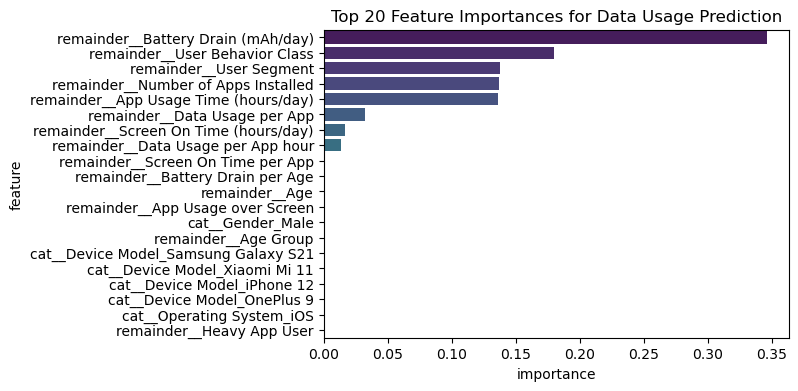

In [74]:
feature_names = preprocessor3.get_feature_names_out()
importances = model3.feature_importances_
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance and select the top 20
top_features = feature_importances.sort_values(by='importance', ascending=False).head(20)

# Plot the top 20 important features
plt.figure(figsize=(6, 4))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Feature Importances for Data Usage Prediction')
plt.show()

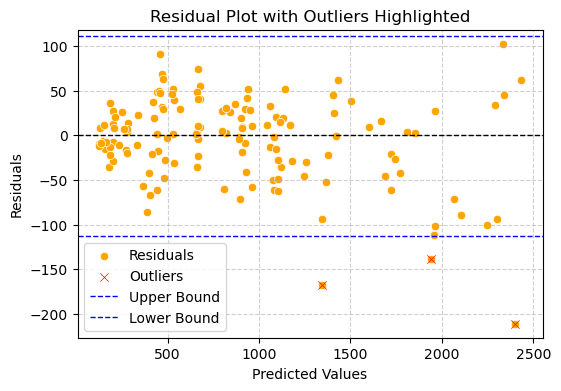

Number of Outliers: 3
Outlier values in residuals:
 54    -210.88
687   -167.27
218   -138.23
dtype: float64


In [76]:
Predicted_Y_test = pd.Series(Predicted_Y_test, index=Y_test.index)
residuals = Y_test - Predicted_Y_test

# Calculate IQR for outlier detection
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

# Plot residuals with outliers highlighted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=Predicted_Y_test, y=residuals, color='orange', label='Residuals')
sns.scatterplot(x=Predicted_Y_test[outliers.index], y=outliers, color='red', label='Outliers', marker='x')  # Highlight outliers
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Line at zero for reference
plt.axhline(y=upper_bound, color='blue', linestyle='--', linewidth=1, label='Upper Bound')
plt.axhline(y=lower_bound, color='blue', linestyle='--', linewidth=1, label='Lower Bound')
plt.title('Residual Plot with Outliers Highlighted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print the number of outliers and the outlier values
print("Number of Outliers:", outliers.count())
print("Outlier values in residuals:\n", outliers)